In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [2]:
df=pd.read_csv("../Data.csv",index_col="Date")
df.index=pd.to_datetime(df.index)

In [3]:
close_series = df['Close']


In [4]:
close_series

Date
2015-02-09     26.766184
2015-02-10     27.280405
2015-02-11     27.919817
2015-02-12     28.273066
2015-02-13     28.411680
                 ...    
2025-02-03    228.009995
2025-02-04    232.800003
2025-02-05    232.470001
2025-02-06    233.220001
2025-02-07    227.630005
Name: Close, Length: 2516, dtype: float64

In [5]:
Close_diff = close_series.diff()
Close_diff = close_series.dropna()


In [6]:
def adf_test(series):
    series = series.dropna()

    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("✅ Données stationnaires")
    else:
        print("❌ Données NON stationnaires")

In [7]:
adf_test(close_series)


ADF Statistic: 0.283475759488255
p-value: 0.976573532441623
❌ Données NON stationnaires


In [8]:
adf_test(Close_diff)


ADF Statistic: 0.283475759488255
p-value: 0.976573532441623
❌ Données NON stationnaires


In [9]:
Close_diff2 = Close_diff.diff().dropna()
print("\nÉtape 3: Deuxième différenciation")
adf_test(Close_diff2)


Étape 3: Deuxième différenciation
ADF Statistic: -15.885644923857054
p-value: 8.656542388073247e-29
✅ Données stationnaires


In [10]:
Close_diff2

Date
2015-02-10    0.514221
2015-02-11    0.639412
2015-02-12    0.353249
2015-02-13    0.138615
2015-02-17    0.167685
                ...   
2025-02-03   -7.990005
2025-02-04    4.790009
2025-02-05   -0.330002
2025-02-06    0.750000
2025-02-07   -5.589996
Name: Close, Length: 2515, dtype: float64

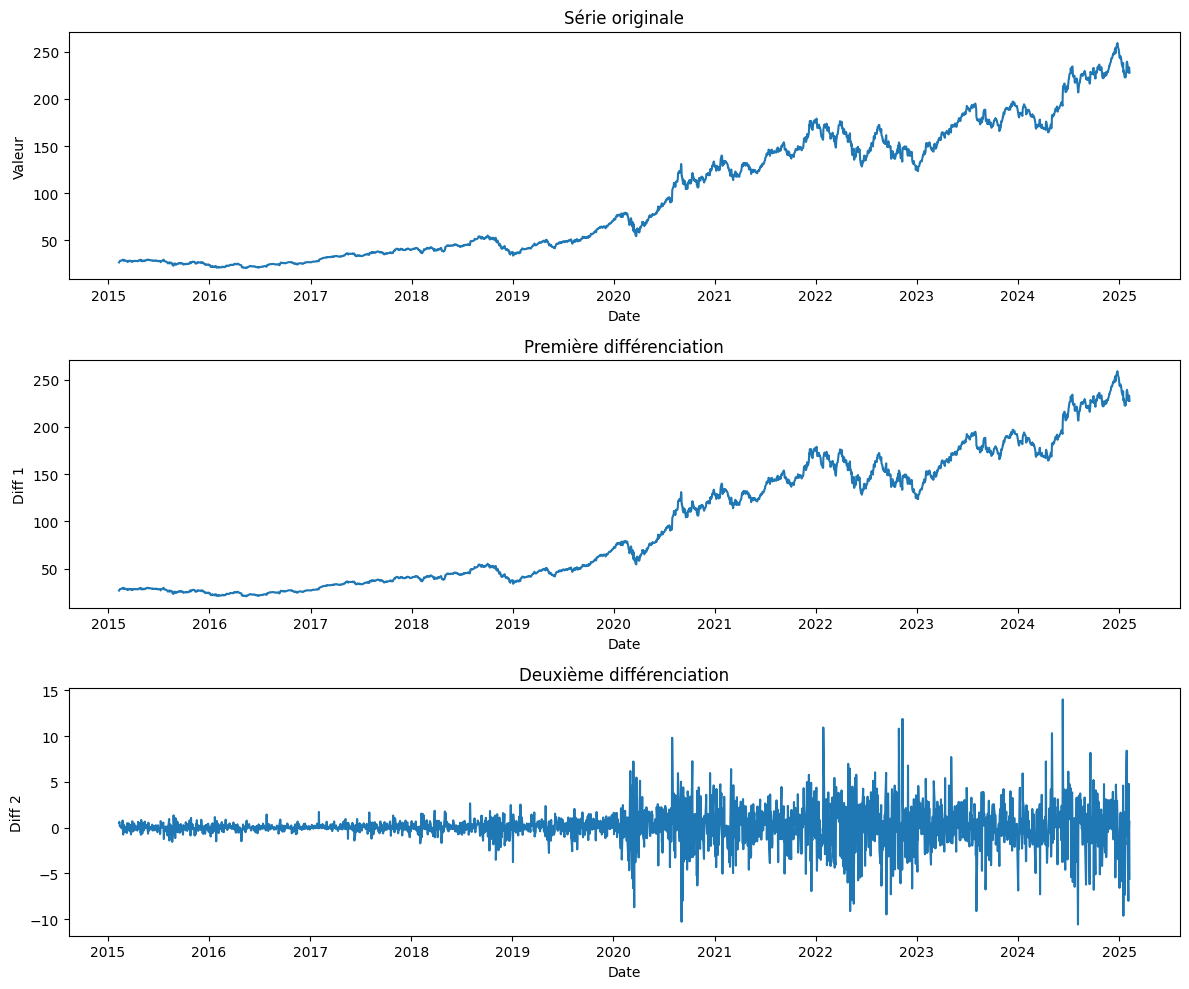

In [11]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Série originale
ax1.plot(close_series)
ax1.set_title('Série originale')
ax1.set_xlabel('Date')
ax1.set_ylabel('Valeur')

# Première différenciation
ax2.plot(Close_diff)
ax2.set_title('Première différenciation')
ax2.set_xlabel('Date')
ax2.set_ylabel('Diff 1')

# Deuxième différenciation
ax3.plot(Close_diff2)
ax3.set_title('Deuxième différenciation')
ax3.set_xlabel('Date')
ax3.set_ylabel('Diff 2')

plt.tight_layout()
plt.show()


In [12]:
# 🎯 2. Division Train/Test

train_data=close_series[0:int(len(close_series)*0.8)]
test_data=close_series[int(len(close_series)*0.8):len(close_series)]


In [13]:
train_data 

Date
2015-02-09     26.766184
2015-02-10     27.280405
2015-02-11     27.919817
2015-02-12     28.273066
2015-02-13     28.411680
                 ...    
2023-01-30    141.511856
2023-01-31    142.788422
2023-02-01    143.916595
2023-02-02    149.250519
2023-02-03    152.892212
Name: Close, Length: 2012, dtype: float64

In [14]:
test_data

Date
2023-02-06    150.151016
2023-02-07    153.040649
2023-02-08    150.339081
2023-02-09    149.299973
2023-02-10    149.666687
                 ...    
2025-02-03    228.009995
2025-02-04    232.800003
2025-02-05    232.470001
2025-02-06    233.220001
2025-02-07    227.630005
Name: Close, Length: 504, dtype: float64

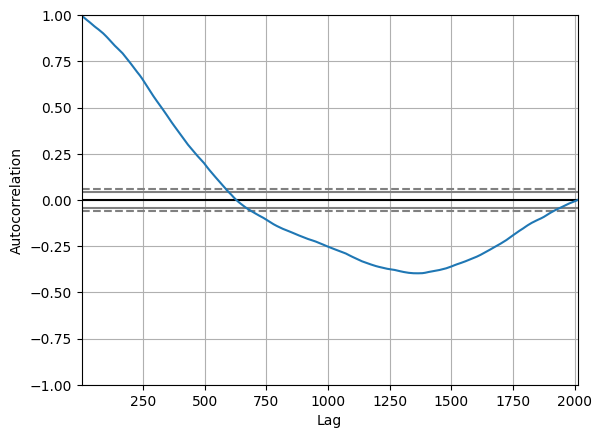

In [15]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(train_data)
pyplot.show()

lag = 600 mais on va utiliser que 10 ( probleme technique )

In [32]:
# 🎯 4. Modèle AutoReg (AR) avec lag=10
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_data, lags=50)
model_fit = model.fit()
coef = model_fit.params
print("\n📌 Coefficients du modèle AR()) :\n", coef)





📌 Coefficients du modèle AR()) :
 const        0.075856
Close.L1     0.956165
Close.L2     0.002048
Close.L3     0.026652
Close.L4     0.013113
Close.L5     0.062909
Close.L6    -0.074023
Close.L7     0.036433
Close.L8    -0.075076
Close.L9     0.090855
Close.L10   -0.080028
Close.L11    0.093406
Close.L12   -0.061765
Close.L13    0.007184
Close.L14    0.010702
Close.L15   -0.026764
Close.L16    0.023537
Close.L17   -0.022093
Close.L18    0.093554
Close.L19   -0.051179
Close.L20   -0.066419
Close.L21    0.061107
Close.L22   -0.069896
Close.L23    0.052135
Close.L24   -0.029458
Close.L25    0.018985
Close.L26   -0.028168
Close.L27    0.053514
Close.L28   -0.010094
Close.L29   -0.013606
Close.L30   -0.027830
Close.L31    0.001120
Close.L32    0.003442
Close.L33   -0.000454
Close.L34    0.062673
Close.L35   -0.016174
Close.L36    0.003791
Close.L37   -0.030500
Close.L38    0.026015
Close.L39   -0.086473
Close.L40    0.032212
Close.L41   -0.023313
Close.L42    0.088661
Close.L43   -0.0505

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:

# 🎯 5a. Prédiction avec `predict()`
predictions1 = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
results = pd.DataFrame({
    'Predicted': predictions1.values,
    'Expected': test_data
}, index=test_data.index)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [34]:
# Afficher les premières comparaisons
print("Comparaison des 10 premières prédictions vs valeurs réelles:")
print(results.head(10))

Comparaison des 10 premières prédictions vs valeurs réelles:
             Predicted    Expected
Date                              
2023-02-06  152.190664  150.151016
2023-02-07  152.398300  153.040649
2023-02-08  152.255391  150.339081
2023-02-09  153.361812  149.299973
2023-02-10  153.310045  149.666687
2023-02-13  153.707010  152.481415
2023-02-14  153.645451  151.837204
2023-02-15  154.270143  153.948273
2023-02-16  154.751181  152.342667
2023-02-17  155.133399  151.192993


In [35]:
# 🎯 6. Évaluation des performances (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse1 = np.sqrt(mean_squared_error(test_data, predictions1))


In [36]:
print(f"\n✅ RMSE (AutoReg.predict) : {rmse1:.4f}")



✅ RMSE (AutoReg.predict) : 33.3691


In [37]:
residuals = test_data.values - predictions1.values



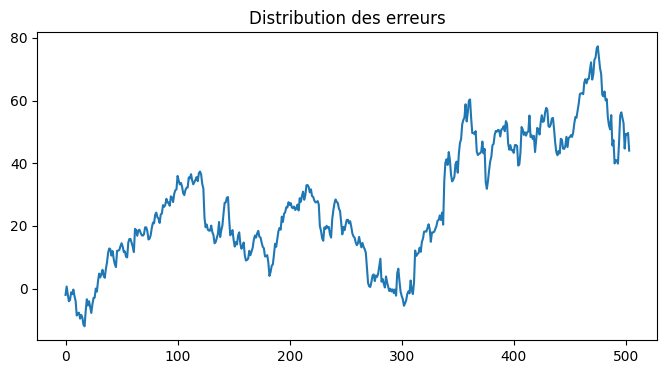

In [38]:

plt.figure(figsize=(8,4))
plt.plot(residuals)
plt.title("Distribution des erreurs")
plt.show()

On remarque que cet erreur n est pas purement white noise , donc on va appliquer MA 

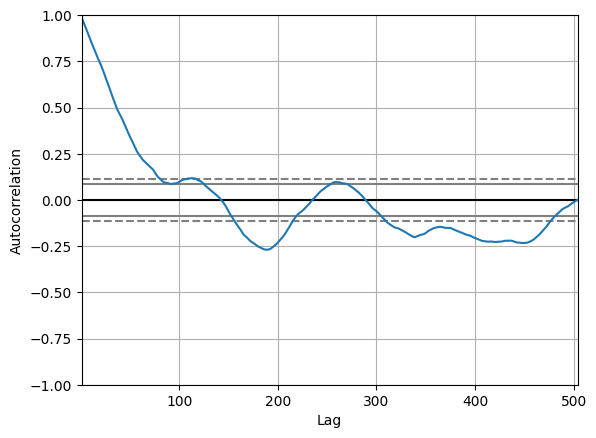

In [39]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(residuals)
pyplot.show()

lag = 50

In [40]:
# 🎯 4. Modèle AutoReg (AR) avec lag=50
from statsmodels.tsa.ar_model import AutoReg

model_error = AutoReg(residuals, lags=50)
model_fit_error = model.fit() 
coef_error = model_fit.params 
print("\n📌 Coefficients du modèle AR() :\n", coef)


📌 Coefficients du modèle AR() :
 const        0.075856
Close.L1     0.956165
Close.L2     0.002048
Close.L3     0.026652
Close.L4     0.013113
Close.L5     0.062909
Close.L6    -0.074023
Close.L7     0.036433
Close.L8    -0.075076
Close.L9     0.090855
Close.L10   -0.080028
Close.L11    0.093406
Close.L12   -0.061765
Close.L13    0.007184
Close.L14    0.010702
Close.L15   -0.026764
Close.L16    0.023537
Close.L17   -0.022093
Close.L18    0.093554
Close.L19   -0.051179
Close.L20   -0.066419
Close.L21    0.061107
Close.L22   -0.069896
Close.L23    0.052135
Close.L24   -0.029458
Close.L25    0.018985
Close.L26   -0.028168
Close.L27    0.053514
Close.L28   -0.010094
Close.L29   -0.013606
Close.L30   -0.027830
Close.L31    0.001120
Close.L32    0.003442
Close.L33   -0.000454
Close.L34    0.062673
Close.L35   -0.016174
Close.L36    0.003791
Close.L37   -0.030500
Close.L38    0.026015
Close.L39   -0.086473
Close.L40    0.032212
Close.L41   -0.023313
Close.L42    0.088661
Close.L43   -0.05059

In [41]:

# 🎯 5a. Prédiction avec `predict()`
predictions_error = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
results_error = pd.DataFrame({
    'Predicted': predictions_error.values,
    'Expected': test_data
}, index=test_data.index)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [42]:
# Afficher les premières comparaisons
print("Comparaison des 10 premières prédictions vs valeurs réelles:")
print(results_error.head(10))

Comparaison des 10 premières prédictions vs valeurs réelles:
             Predicted    Expected
Date                              
2023-02-06  152.190664  150.151016
2023-02-07  152.398300  153.040649
2023-02-08  152.255391  150.339081
2023-02-09  153.361812  149.299973
2023-02-10  153.310045  149.666687
2023-02-13  153.707010  152.481415
2023-02-14  153.645451  151.837204
2023-02-15  154.270143  153.948273
2023-02-16  154.751181  152.342667
2023-02-17  155.133399  151.192993


In [43]:
residuals_err = test_data.values - predictions_error.values

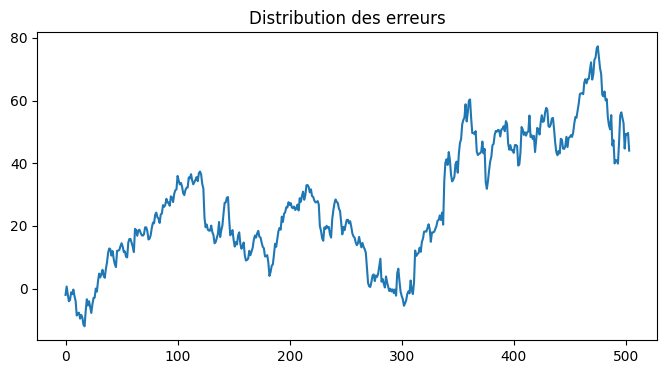

In [44]:
plt.figure(figsize=(8,4))
plt.plot(residuals_err)
plt.title("Distribution des erreurs")
plt.show()